In [1]:
# Create eigs for bsnip and PNC
# 1, 3, 5, 10, 15, 20

import pickle
import numpy as np

demodir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/BSNIP/'
demo = pickle.load(open(f'{demodir}/demographics.pkl', 'rb'))
fc = []
subs = []

for sub in demo['Age_cal']:
    fc.append(np.load(f'{demodir}/fc/{sub}_task-unk_fc.npy'))
    subs.append(sub)
    
fc = np.stack(fc)
print(fc.shape, len(subs))

(1244, 34716) 1244


In [2]:
# Jitter Only

def mat2vec(mat):
    a,b = np.triu_indices(264,1)
    return mat[:,a,b]

a,b = np.triu_indices(264,1)
X = np.ones((fc.shape[0],264,264))
X[:,a,b] = fc
X[:,b,a] = fc
w, v = np.linalg.eig(X)
print('Done eigs')

w[:,20:] = 0
aps20 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps20 = mat2vec(aps20)
print('Done 20')

w[:,15:] = 0
aps15 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps15 = mat2vec(aps15)
print('Done 15')

w[:,10:] = 0
aps10 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps10 = mat2vec(aps10)
print('Done 10')

w[:,5:] = 0
aps5 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps5 = mat2vec(aps5)
print('Done 5')

w[:,3:] = 0
aps3 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps3 = mat2vec(aps3)
print('Done 3')

w[:,1:] = 0
aps1 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps1 = mat2vec(aps1)
print('Done 1')

w = None
v = None
X = None

Done eigs
Done 20
Done 15
Done 10
Done 5
Done 3
Done 1


In [3]:
# Save work

bsnipdir = '/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/BSNIP'

for i,sub in enumerate(subs):
    np.save(f'{bsnipdir}/Top20/{sub}_task-unktop20_fc.npy', aps20[i])
    np.save(f'{bsnipdir}/Top15/{sub}_task-unktop15_fc.npy', aps15[i])
    np.save(f'{bsnipdir}/Top10/{sub}_task-unktop10_fc.npy', aps10[i])
    np.save(f'{bsnipdir}/Top5/{sub}_task-unktop5_fc.npy', aps5[i])
    np.save(f'{bsnipdir}/Top3/{sub}_task-unktop3_fc.npy', aps3[i])
    np.save(f'{bsnipdir}/Top1/{sub}_task-unktop1_fc.npy', aps1[i])
    if i%100 == 0:
        print(f'Done {i}')

print('Complete')

Done 0
Done 100
Done 200
Done 300
Done 400
Done 500
Done 600
Done 700
Done 800
Done 900
Done 1000
Done 1100
Done 1200
Complete


In [4]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


/tmp/ipykernel_61334/1279695415.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


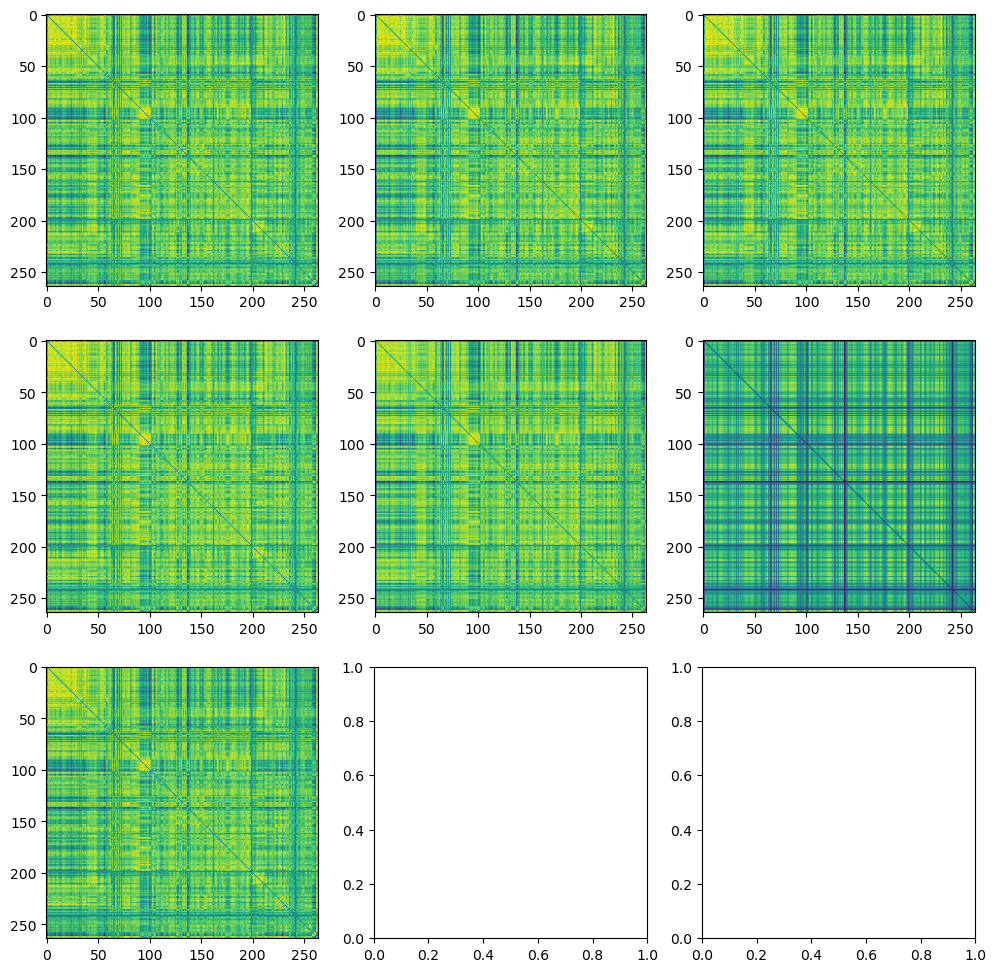

In [18]:
# Check some of the decompositions

import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,3,figsize=(12,12))

i = 15

ax[0,0].imshow(remap(vec2mat(aps20[i])))
ax[0,1].imshow(remap(vec2mat(aps15[i])))
ax[0,2].imshow(remap(vec2mat(aps10[i])))
ax[1,0].imshow(remap(vec2mat(aps5[i])))
ax[1,1].imshow(remap(vec2mat(aps3[i])))
ax[1,2].imshow(remap(vec2mat(aps1[i])))
ax[2,0].imshow(remap(vec2mat(fc[i])))

fig.show()

In [15]:
import pickle
import numpy as np

demodir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/PNC/'
demo = pickle.load(open(f'{demodir}/demographics.pkl', 'rb'))
fc = []
subs = []
task = 'emoid'

for sub in demo['age_at_cnb']:
    try:
        fc.append(np.load(f'{demodir}/fc/{sub}_task-{task}_fc.npy'))
        subs.append(sub)
    except:
        pass
    
fc = np.stack(fc)
print(fc.shape, len(subs))

(1500, 34716) 1500


In [16]:
# Jitter Only

def mat2vec(mat):
    a,b = np.triu_indices(264,1)
    return mat[:,a,b]

a,b = np.triu_indices(264,1)
X = np.ones((fc.shape[0],264,264))
X[:,a,b] = fc
X[:,b,a] = fc
w, v = np.linalg.eig(X)
print('Done eigs')

w[:,20:] = 0
aps20 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps20 = mat2vec(aps20)
print('Done 20')

w[:,15:] = 0
aps15 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps15 = mat2vec(aps15)
print('Done 15')

w[:,10:] = 0
aps10 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps10 = mat2vec(aps10)
print('Done 10')

w[:,5:] = 0
aps5 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps5 = mat2vec(aps5)
print('Done 5')

w[:,3:] = 0
aps3 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps3 = mat2vec(aps3)
print('Done 3')

w[:,1:] = 0
aps1 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps1 = mat2vec(aps1)
print('Done 1')

w = None
v = None
X = None

Done eigs
Done 20
Done 15
Done 10
Done 5
Done 3
Done 1


In [17]:
# Save work

pncdir = '/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/PNC'

for i,sub in enumerate(subs):
    np.save(f'{pncdir}/Top20/{sub}_task-{task}top20_fc.npy', aps20[i])
    np.save(f'{pncdir}/Top15/{sub}_task-{task}top15_fc.npy', aps15[i])
    np.save(f'{pncdir}/Top10/{sub}_task-{task}top10_fc.npy', aps10[i])
    np.save(f'{pncdir}/Top5/{sub}_task-{task}top5_fc.npy', aps5[i])
    np.save(f'{pncdir}/Top3/{sub}_task-{task}top3_fc.npy', aps3[i])
    np.save(f'{pncdir}/Top1/{sub}_task-{task}top1_fc.npy', aps1[i])
    if i%100 == 0:
        print(f'Done {i}')

print('Complete')

Done 0
Done 100
Done 200
Done 300
Done 400
Done 500
Done 600
Done 700
Done 800
Done 900
Done 1000
Done 1100
Done 1200
Done 1300
Done 1400
Complete
